# Exercise 4

In [ ]:
%matplotlib inline
import pandas as pd

titles = pd.read_csv('/content/titles.csv')
titles.head()

cast = pd.read_csv('/content/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [ ]:
both = cast[(cast.character=='Superman') | (cast.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)
diff = both.Superman - both.Batman
print("Superman: " + str(len(diff[diff>0])))

Superman: 5


# How many years have been "Batman years", with more Batman characters than Superman characters?

In [ ]:
both = cast[(cast.character=='Superman') | (cast.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)
diff = both.Batman - both.Superman
print("Batman: " + str(len(diff[diff>0])))

Batman: 7


# Plot the number of actor roles each year and the number of actress roles each year over the history of film.

<Axes: xlabel='year'>

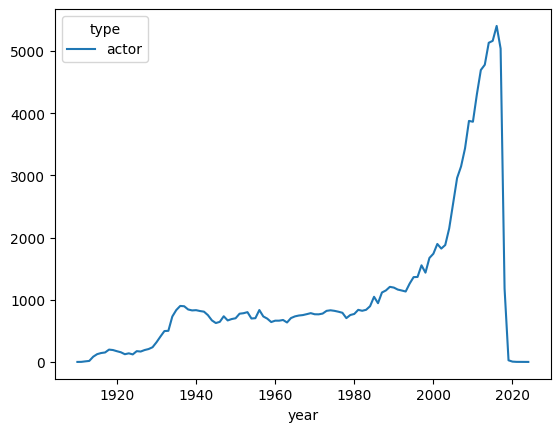

In [ ]:
cast.groupby(['year','type']).size().unstack().plot()

# Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<Axes: xlabel='year'>

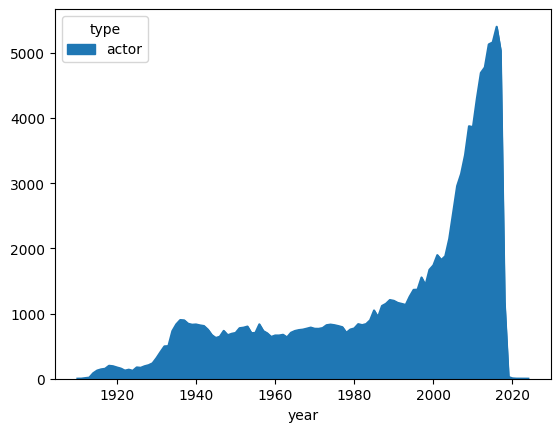

In [ ]:
cast.groupby(['year','type']).size().unstack().plot(kind='area')

# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [ ]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
print(c)


type  actor
year       
1908      1
1910      3
1911      7
1912     15
1913     37
...     ...
2018   1831
2019     49
2020      9
2021      2
2024      1

[114 rows x 1 columns]


# Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [ ]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
print(c)

type  actor
year       
1908      1
1910      3
1911      7
1912     15
1913     37
...     ...
2018   1831
2019     49
2020      9
2021      2
2024      1

[114 rows x 1 columns]


# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [ ]:

c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
print(c)

type  actor
year       
1910      1
1912      1
1913      2
1914      9
1915     17
...     ...
2015    178
2016    180
2017    161
2018     27
2019      1

[109 rows x 1 columns]


# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [ ]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
print(c)

type      actor
year n         
1908 1.0      1
1910 2.0      1
1911 3.0      2
1912 1.0      2
     2.0      1
...         ...
2017 3.0    158
2018 1.0     32
     2.0     27
     3.0     22
2019 2.0      1

[324 rows x 1 columns]
